<a href="https://colab.research.google.com/github/jeevang/test-repo/blob/master/carsimport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/data 2.csv"
df = pd.read_csv(path)
df.head(20)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,27,18,3916,37200


In [28]:
#understanding the entire shape of the dataframe
print(df.shape)
#understanding the data types within the data frame
print(df.dtypes)
#understanding the columns headers
print(df.columns)
df[['Make', 'Engine HP', 'Market Category']]

#print(df.iloc[1:4])
#type(df['Popularity'])
#Statistical Summary of all columns
print(df.describe())
#Finding null variables and dropping if any of have Null values
print(df.isnull().sum())
null_values_dropped = df.dropna(subset=['Engine HP', 'Engine Cylinders', 'Engine Fuel Type'])
print("Number of files removed: {}".format(null_values_dropped.shape[0] - df.shape[0]))
#df[df['Engine HP'].isnull()]
#df.dropna(how = 'any').shape


#Understanding the number of dupliates
print(df.duplicated().sum())
#removing the duplicate files
duplicates_removed = df.loc[df.duplicated(keep = False)]
print(duplicates_removed)
print("Number of files removed: {}".format(df.shape[0] - duplicates_removed.shape[0]))


#correlation matrix
print(df.corr())

#df.loc[df['Vehicle Style']=='Sedan']
#df.sort_values(['Make','Year'], ascending=[1,0])
#df.groupby('Make').agg({'Popularity': 'mean'}).sort_values('Popularity', ascending = False)
#df.groupby('Make').mean().sort_values('Popularity', ascending = False)


#df.loc[df.duplicated(keep = False)]




(11914, 16)
Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object
Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')
               Year    Engine HP  ...    Popularity          MSRP
count  11914.000000  11845.00000  ...  11914.000000  1.191400e+04
mean    2010.384338    249.38607  ...   1554.911197  4.059474e+04
std        7.579740    10

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe948199e48>,
      dtype=object)

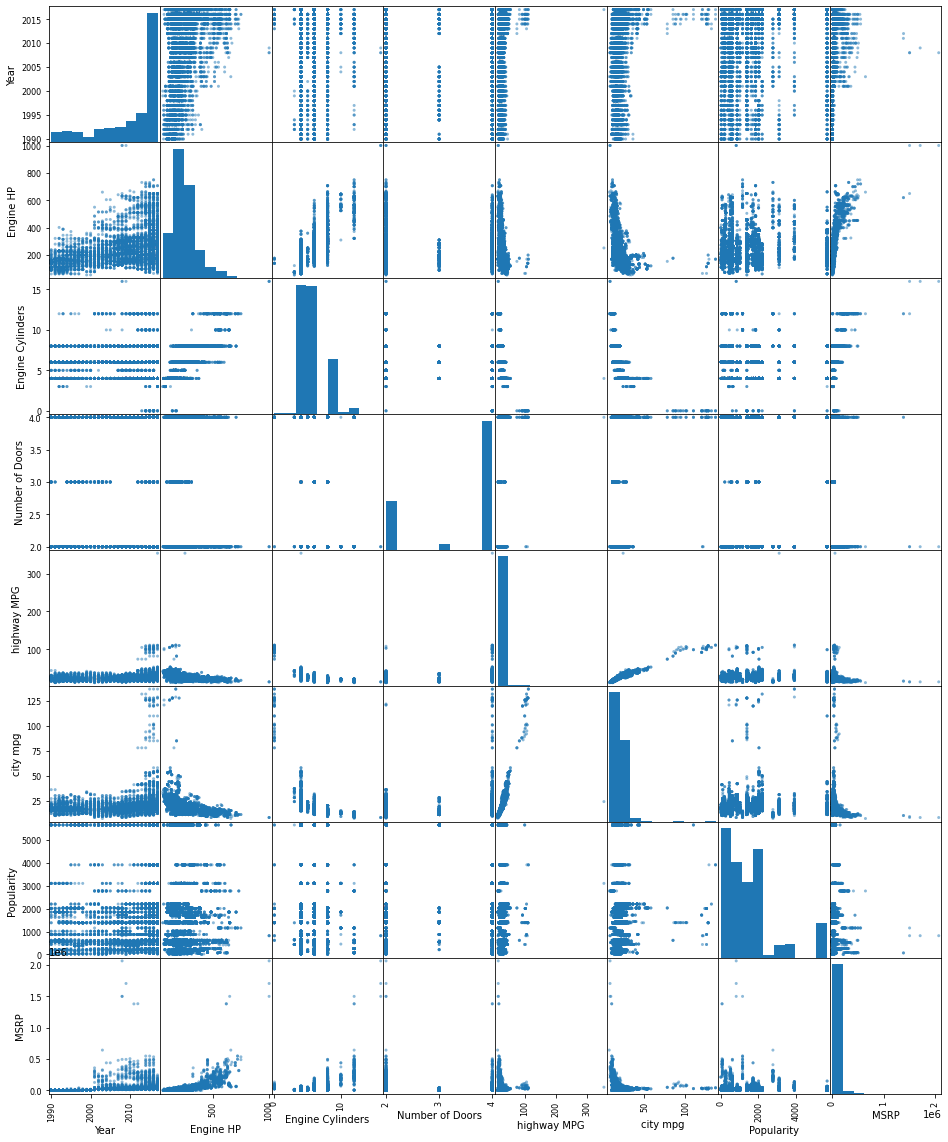

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import scatter_matrix
%matplotlib inline

#Understing the correlation of different variables

scatter_matrix(df, figsize=(16,20))

220922.04784302652
-139732.57377890032


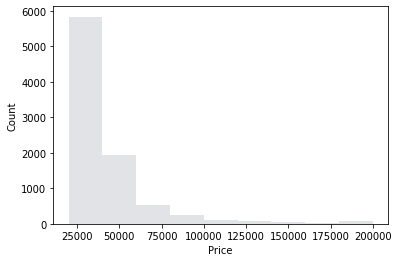

In [63]:
from scipy.stats import norm
#further looking at MSRP,  Year, 
#bins = [5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,60000,65000,70000,75000,80000,85000,90000,95000,100000]
bins = [20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000]
#plt.hist(df['Year'])
#plt.xlabel("Years")
#plt.ylabel("Count/No of cars")
#plt.show

plt.hist(df['MSRP'], bins=bins, color = "#2342")
plt.xlabel('Price')
plt.ylabel('Count')

#rng = np.arange(df.MSRP.min(), df.MSRP.max(), 20000)
#plt.plot(rng, norm.pdf(rng,df.MSRP.mean(),df.MSRP.std()))
plt.show
upper_limit = df.MSRP.mean() + 3*df.MSRP.std()
print(upper_limit)
lower_limit = df.MSRP.mean() - 3*df.MSRP.std()  
print(lower_limit)



#how would I show multiple histograms? Maybe create a funtion?

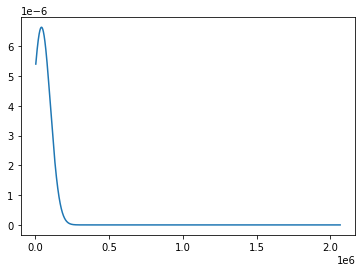

In [56]:
from scipy.stats import norm
df['MSRP'].min()
df['MSRP'].max()

rng = np.arange(df.MSRP.min(), df.MSRP.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.MSRP.mean(),df.MSRP.std()))
